In [ ]:
import os
import json
from train_unet import convert_labels
import matplotlib.pyplot as plt


In [ ]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw')
img_path = os.path.join(data_path, 'images')
label_path = os.path.join(data_path, 'labels')

label_1 = os.listdir(label_path)[0]
img_1 = os.listdir(img_path)[0]
print(label_1)
print(img_1)
with open(os.path.join(label_path, label_1)) as f:
    test_label = convert_labels(f)


# Data Augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
# from preprocessing import ImageDataGenerator
%matplotlib inline

In [ ]:
gen = ImageDataGenerator(rotation_range=10,
                        width_shift_range=0,
                        height_shift_range=0,
                        shear_range=0.15,
                        zoom_range=0.1,
                        channel_shift_range=10,
                        horizontal_flip=True)

In [ ]:
test_img= np.expand_dims(plt.imread(os.path.join(img_path,img_1)),0)

plt.imshow(test_img[0])
plt.show()
print(test_img.shape)
aug_iter = gen.flow(test_img)

In [ ]:
plt.imshow(next(aug_iter)[0].astype(np.uint8))
plt.show()

In [ ]:
aug_images = [next(aug_iter)[0]]

# Create right paths and also processed data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import convert_labels

import pyarrow
import pyarrow.parquet as pq

import cv2
%matplotlib notebook

In [2]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw')
img_path = os.path.join(data_path, 'images')
label_path = os.path.join(data_path, 'labels')

In [3]:
label_names = os.listdir(label_path)
label_names

img_names = os.listdir(img_path)
img_names.sort()

In [4]:
regions_names = [x for x in label_names if 'regions' in x]
surfaces_names = [x for x in label_names if 'surfaces' in x]
layers_names = [x for x in label_names if 'layers' in x]

# sort them
regions_names.sort()
surfaces_names.sort()
layers_names.sort()

common_names = [x.split('.')[0] for x in regions_names]
# checking is sorted right
x1 = [x.split('.')[0] for x in regions_names]
x2 = [x.split('.')[0] for x in surfaces_names]
x3 = [x.split('.')[0] for x in layers_names]
x4 = [x.split('.')[0] for x in img_names]

print(x1 == x2)
print(x1 == x3)
print(x2 == x3)
print(x1 == x4)

True
True
True
True


In [ ]:
print(os.path.join(label_path, regions_names[0]))
print(os.path.join(label_path, surfaces_names[0]))
print(os.path.join(label_path, layers_names[0]))
print(os.path.join(img_path, img_names[0]))

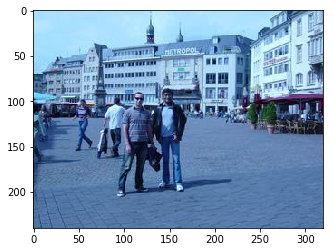

In [5]:
img_1 = plt.imread(os.path.join(img_path, img_names[0]))
plt.imshow(img_1)

In [ ]:
# Reading the regions txt file
with open(os.path.join(label_path,regions_names[0])) as f:
    reg_1 = convert_labels(f)
# Reading the surfaces txt file
with open(os.path.join(label_path,surfaces_names[0])) as f:
    surf_1 = convert_labels(f)
# Reading the layers txt file
with open(os.path.join(label_path,layers_names[0])) as f:
    lay_1 = convert_labels(f)


In [18]:
img_1

array([[[175, 226, 255],
        [175, 226, 255],
        [175, 226, 255],
        ...,
        [140, 173, 214],
        [141, 174, 217],
        [134, 167, 210]],

       [[175, 226, 255],
        [175, 226, 255],
        [174, 225, 254],
        ...,
        [155, 188, 229],
        [147, 180, 223],
        [126, 159, 202]],

       [[175, 226, 255],
        [174, 225, 255],
        [174, 225, 255],
        ...,
        [157, 190, 231],
        [148, 181, 224],
        [121, 154, 197]],

       ...,

       [[ 83, 117, 165],
        [ 84, 118, 166],
        [ 85, 119, 167],
        ...,
        [ 79, 113, 161],
        [ 86, 120, 168],
        [ 91, 125, 173]],

       [[ 83, 117, 165],
        [ 84, 118, 166],
        [ 85, 119, 167],
        ...,
        [ 87, 121, 169],
        [ 80, 114, 162],
        [ 75, 109, 157]],

       [[ 78, 112, 160],
        [ 79, 113, 161],
        [ 79, 113, 161],
        ...,
        [ 89, 123, 171],
        [ 91, 125, 173],
        [ 92, 126, 174]]

In [17]:
img_1[:,:,[2,1,0]]

array([[[255, 226, 175],
        [255, 226, 175],
        [255, 226, 175],
        ...,
        [214, 173, 140],
        [217, 174, 141],
        [210, 167, 134]],

       [[255, 226, 175],
        [255, 226, 175],
        [254, 225, 174],
        ...,
        [229, 188, 155],
        [223, 180, 147],
        [202, 159, 126]],

       [[255, 226, 175],
        [255, 225, 174],
        [255, 225, 174],
        ...,
        [231, 190, 157],
        [224, 181, 148],
        [197, 154, 121]],

       ...,

       [[165, 117,  83],
        [166, 118,  84],
        [167, 119,  85],
        ...,
        [161, 113,  79],
        [168, 120,  86],
        [173, 125,  91]],

       [[165, 117,  83],
        [166, 118,  84],
        [167, 119,  85],
        ...,
        [169, 121,  87],
        [162, 114,  80],
        [157, 109,  75]],

       [[160, 112,  78],
        [161, 113,  79],
        [161, 113,  79],
        ...,
        [171, 123,  89],
        [173, 125,  91],
        [174, 126,  92]]

In [ ]:
img_1.shape[:-1]

In [ ]:
# plotting the region labels
plt.imshow(np.reshape(reg_1,img_1.shape[:-1]))
# surf_1
# lay_1

In [ ]:
# plotting the surface labels
plt.imshow(np.reshape(surf_1,img_1.shape[:-1]))

In [ ]:
print(max(surf_1))
print(min(surf_1))
print(len(surf_1))

print(max(reg_1))
print(min(reg_1))
print(len(reg_1))


In [ ]:
common_names[0]

In [ ]:
np.reshape(surf_1,img_1.shape[:-1])

In [ ]:
cv2.imwrite(os.path.join(processed_label_path,common_names[0]) +'.tif',a)

In [ ]:
for i in range(len(regions_names)):
    cv2.imwrite(regions_names[i],)

In [ ]:
def make_dir(directory):
    '''
    Creates a directory if there is no directory
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
    else:
        print("Directory already exist: {}. No action taken".format(directory))

In [ ]:
import os

processed_data_path = os.path.join(os.getcwd(), '..', 'data', 'processed')
processed_label_path = os.path.join(processed_data_path, 'labels')

if not os.path.exists(processed_label_path):
    os.makedirs(processed_label_path)